In [1]:
import imageio
from skimage.transform import rescale
import os
import pandas as pd
import numpy as np
import operator
import math
from skimage.transform import rescale
from matplotlib import pyplot as plt

In [2]:
directory = "../data/CAT_01"
image_target_size = (300, 300)

In [3]:
def read_image_folder(directory):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            image = imageio.imread(f'{directory}/{filename}')
            images.append(image)
    return images

In [4]:
def find_min_px(images):
    minima = 1000
    x, y = [], []
    for i in range(len(images)):
        x.append(images[i].shape[0])
        y.append(images[i].shape[1])
        if x[i] <= y[i]:
            xy = x[i]
        else:
            xy = y[i]
        if minima > xy:
            minima = xy
    return minima

def delete_min_px(images, minima):
    x, y = [], []
    new_images = []
    for i in range(len(images)):
        x.append(images[i].shape[0])
        y.append(images[i].shape[1])
        if x[i] >= minima and y[i] >= minima:
            new_images.append(images[i])
    return new_images

In [ ]:
images = read_image_folder(directory)

In [ ]:
find_min_px(images)

216

In [ ]:
len(images)

1616

In [ ]:
images = delete_min_px(images, image_target_size[0])
len(images)

1598

In [ ]:
def cropND(img, image_target_size):
    start = tuple(map(lambda a, da: a//2-da//2, img.shape, image_target_size))
    end = tuple(map(operator.add, start, image_target_size))
    slices = tuple(map(slice, start, end))
    return img[slices]

def crop_img_arr(images, image_target_size):
    new_images = []
    for img in images:
        new_images.append(cropND(img, image_target_size))
    return new_images

def scale_down_img_arr(images, image_target_size):
    new_images = []
    for img in images:
        if img.shape[0] <= img.shape[1]:
            xy = img.shape[0]
        else:
            xy = img.shape[1]
        if xy > image_target_size[0]:
            img = rescale(image=img, scale=image_target_size[0]/xy, multichannel=True, anti_aliasing=False)
            new_images.append(img)
    return new_images
        
def reshape_img_to_vec(img):
    return img.reshape(img.shape[0]*img.shape[1], 3)

def reshape_vec_to_img(img):
    return img.reshape(int(math.sqrt(img.shape[0])), int(math.sqrt(img.shape[0])), 3)

/home/alex/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


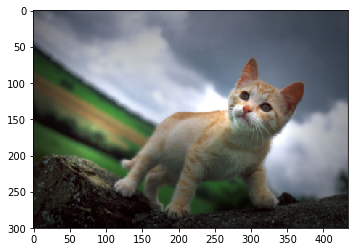

In [ ]:
img = rescale(image=images[0], scale=image_target_size[0]/images[0].shape[0], multichannel=True, anti_aliasing=True)
plt.imshow(img, interpolation='none')
plt.show()

In [ ]:
images = scale_down_img_arr(images, image_target_size)

In [ ]:
plt.imshow(images[0], interpolation='none')
plt.show()

In [ ]:
images[0].shape

In [ ]:
images = crop_img_arr(images, image_target_size)

In [ ]:
plt.imshow(images[0], interpolation='none')
plt.show()

In [ ]:
images[0].shape